In [13]:
# imports
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import random
from numpy import linalg as LA
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean


Populating the interactive namespace from numpy and matplotlib


/home/kapi/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test', 'hist', 'size', 'resize', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
rcParams['figure.dpi'] = 200

In [24]:
def dist(img1, img2):
    res = numpy.linalg.norm(img1 - img2, ord = 1)
    return res

def dist_complex(img1, img2):
    res = 0
    for i in range(len(img1)):
        res += abs(img1[i] - img2[i])
    return res;

def scale(img, mult):
    res = rescale(img, 1 / mult, anti_aliasing=False).flatten() * 200
        
    return res.astype(int)

#initialization
def load_pic():
    class_count = 40
    image_count = 10
    imgs = []
    for i in range(class_count):
        imgs.append([])
        for j in range(image_count):
            address = "data/s" + str(i+1) + "/" + str(j+1) + ".pgm"
            imgs[i].append(mpimg.imread(address))
    return imgs

#set test, train

def test_train(imgs, count):
    train = []
    test = []
    for i in imgs:
        train.append(i[:count])
        test.append(i[count:])
    return test, train

def dct2(img2, size):
    img = np.array(img2)
    m = dct(dct(img.T, norm='ortho').T, norm='ortho')
    res = []
    for i in range(size[0]):
        for j in range(size[1]):
            res.append(m[i][j])
    return np.array(res) 

def hist(img, count):
    res = []
    for i in range(count):
        res.append(0)
    for i in img:
        for j in i:
            res[int((j/255)*count)] += 1
    return res;

def vote(result, class_count):
    voted = []
    for i in range (len(result[0])):
        value = [0]*class_count
        for j in result:
            value[j[i]] += 1
        max_id = 0
        max_value = value[0]
        for i in range(len(value)):
            if (value[i] > value[max_id]):
                max_id = i
                max_value = value[i]
        voted.append(max_id)
    return voted

def fr(test, train, count_to_load):
    res = 0
    res_list = []
    for i in range(len(test)):
        for j in range(len(test[0])):
            i_id = 0
            image_m = test[i][j]
            i_dist_min = dist(image_m, train[0][0])
            for q in range(len(train)):
                for p in range(len(train[0])):
                    i_dist = dist(image_m, train[q][p])
                    if (i_dist < i_dist_min):
                        i_dist_min = i_dist
                        i_id = q
            if (i_id == i):
                res += 1
            res_list.append(i_id)
    accuracy = res/(10-count_to_load)/40
    print(accuracy)
    return res_list, accuracy
            
def fr_pic(test, train):
    res = 0
    res_list = []
    for i in range(len(test)):
#         res_list.append([])
        for j in range(len(test[0])):
            i_id = 0
            i_num = 0
            image_m = test[i][j]
            i_dist_min = dist(image_m, train[0][0])
            for q in range(len(train)):
                for p in range(len(train[0])):
                    i_dist = dist(image_m, train[q][p])
                    if (i_dist < i_dist_min):
                        i_dist_min = i_dist
                        i_num = p
                        i_id = q
            if (i_id == i):
                res += 1
            res_list.append([i_id, i_num])
#     print(res/(10-count_to_load)/40)
    return res_list

In [16]:
def get_imgs_scaled(imgs, mult):
    res = []
    for i in range(class_count):
        res.append([])
        for j in range(image_count):
            res[i].append(scale(imgs[i][j], mult))
    return res

In [17]:
def get_pca(imgs):
    V = np.cov(imgs.T)
    values, vectors = eig(V)
    P = vectors.T.dot(imgs.T).T
    return P

def get_pca_imgs(imgs, main_values):
    imgs_prePCA = get_imgs_scaled(imgs, 3)
    reshapeY = 37
    reshapeX = 31
    m_imgs = np.reshape(imgs_prePCA, (total_imgs , len(imgs_prePCA[0][0])))
    mid = (m_imgs.sum(axis=0) / total_imgs).astype(int)
    m_imgs = m_imgs - mid
    pca = get_pca(m_imgs)
    res = []
    count = 0
    for i in range(class_count):
        res.append([])
        for j in range(image_count):
            res[i].append(pca[count][:main_values])
            count += 1
    return res
        

In [18]:
imgs = load_pic()
count_to_load = 5
image_count = 10
class_count = 40
total_imgs = image_count*class_count
result = []
for i in range(10):
    result.append([])
    for j in range(10):
        result[i].append([])
        
        
imgs_scaled = []
mult = 4
for i in range(class_count):
    imgs_scaled.append([])
    for j in range(image_count):
        imgs_scaled[i].append(scale(imgs[i][j], mult))
    
imgs_cos = []
size = [5, 5]
for i in range(class_count):
    imgs_cos.append([])
    for j in range(image_count):
        imgs_cos[i].append(dct2(imgs[i][j], size))

In [25]:
mult = 4
test_count = 10
for i in range(1,test_count):
    test, train = test_train(imgs_scaled, i)
    result[i-1][0], _ = (fr(test, train, i))

0.7472222222222222
0.853125
0.8821428571428571
0.9166666666666666
0.945
0.98125
0.975
0.975
0.95


In [26]:
for i in range(1,test_count):
    test, train = test_train(imgs_cos, i)
    result[i-1][1], _ = (fr(test, train,i ))

0.725
0.81875
0.85
0.8875
0.9
0.96875
0.9666666666666666
0.975
0.975


(40, 10, 112, 92)
0.125
0.6799999999999999
0.8300000000000001
0.86
0.8949999999999999
0.89


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.885


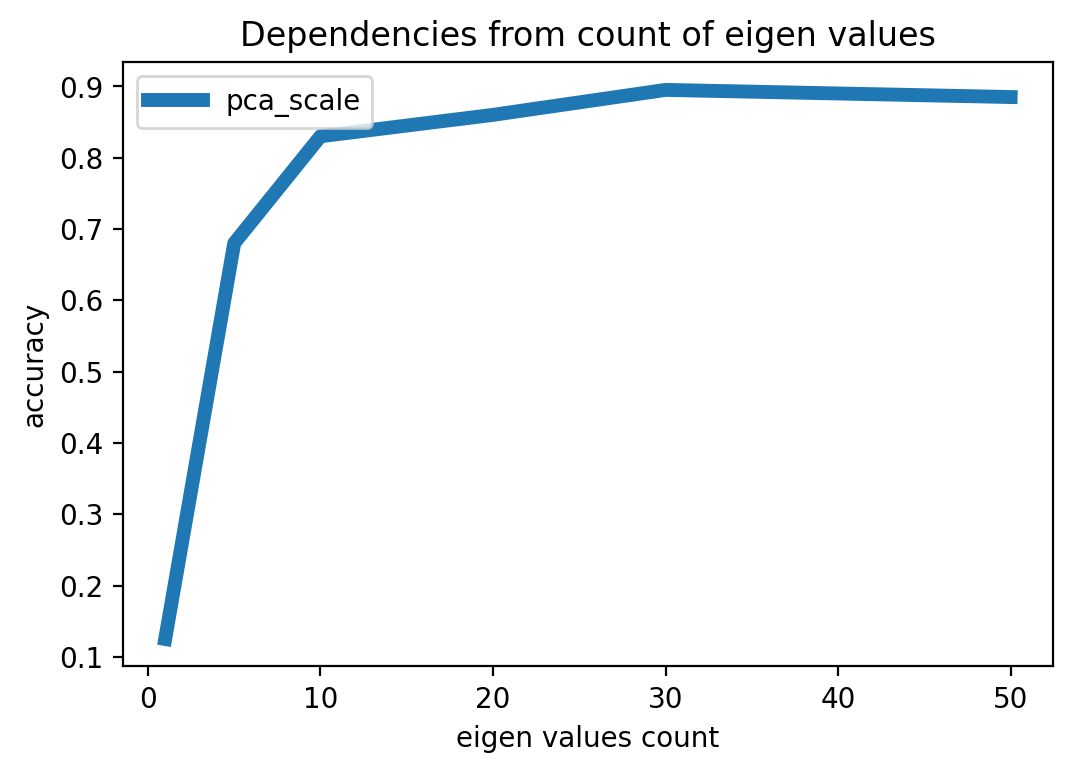

In [29]:
pca_eig_count_acc = []
eigs =[1, 5, 10, 20, 30, 40, 50]

print(np.array(imgs).shape)

for eig_count in eigs:
    imgs_pca = get_pca_imgs(imgs, eig_count)
    test, train = test_train(imgs_pca, 5)
    _, acc = (fr(test, train, 5))
    pca_eig_count_acc.append(acc)
    
x = list(range(1,10))
plt.title('Dependencies from count of eigen values')   # заголовок
plt.xlabel('eigen values count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(eigs, pca_eig_count_acc, label = "pca_scale", linewidth=5.0)

plt.legend()
plt.savefig("res/pca_scale_eig.eps")

In [22]:
imgs_pca = get_pca_imgs(imgs, 30)

In [23]:
pca_acc = []

for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_pca, count_to_load)
    result[i-1][2], acc = (fr(test, train))
    pca_acc.append(acc)

0.7083333333333333
0.825
0.85
0.8875
0.8949999999999999
0.95
0.95
0.9375
0.925


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.7083333333333333, 0.825, 0.85, 0.8875, 0.8949999999999999, 0.95, 0.95, 0.9375, 0.925]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


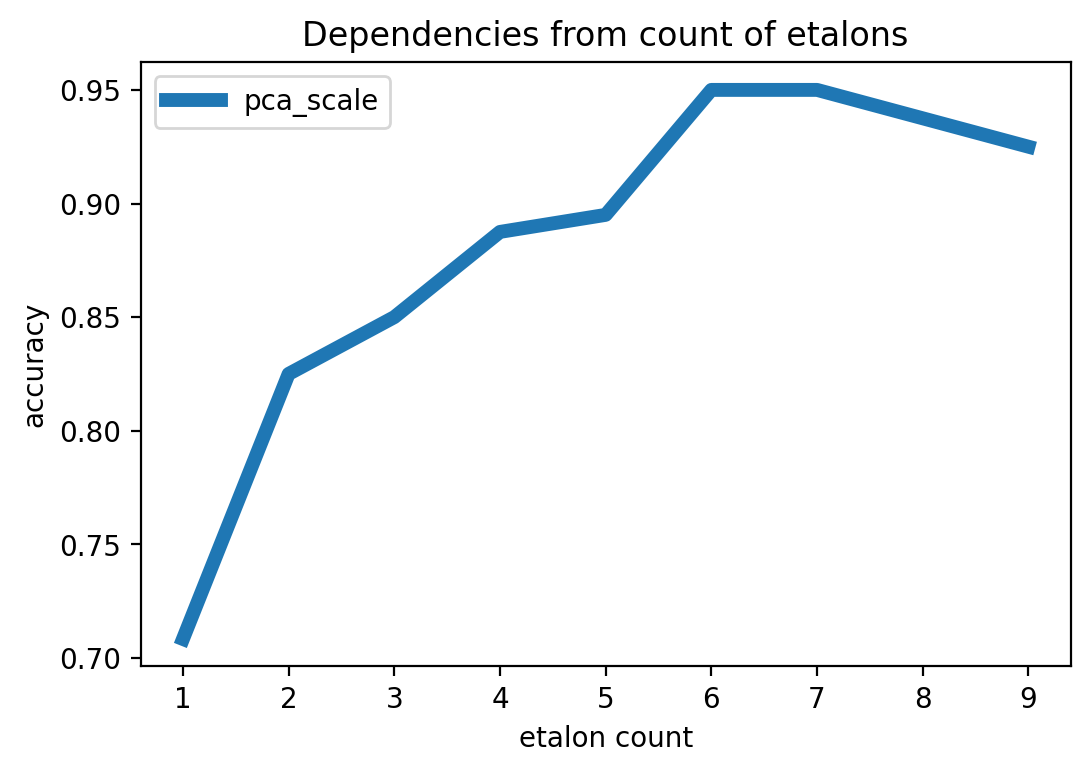

In [167]:
x = list(range(1,10))
print(pca_acc)
print(x)
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(x, pca_acc, label = "pca_scale", linewidth=5.0)

plt.legend()
plt.savefig("res/pca_scale.eps")

In [33]:
def get_pca2(imgs):
    V = np.cov(imgs)
    values, vectors = eig(V)
    v2 = []
    for i in range(30):
        v2.append(vectors[i])
    v2 = np.array(v2)
    temp = imgs.T.dot(v2.T).T
    P = temp.dot(imgs.T)
    return P.T

def get_pca_imgs_shmidt(imgs, main_values):
    imgs_prePCA = np.array(get_imgs_scaled(imgs, 1))
    m_imgs = np.reshape(imgs_prePCA, (total_imgs , len(imgs_prePCA[0][0])))
    mid = (m_imgs.sum(axis=0) / total_imgs).astype(int)
    m_imgs = m_imgs - mid
    pca = get_pca2(m_imgs)
    res = []
    count = 0
    for i in range(class_count):
        res.append([])
        for j in range(image_count):
            res[i].append(pca[count][:main_values-1])
            count += 1
        
    pca_shmidt = np.array(res)
    return pca_shmidt

(40, 10, 112, 92)
0.025
0.445
0.745
0.77
0.74
0.73


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.73


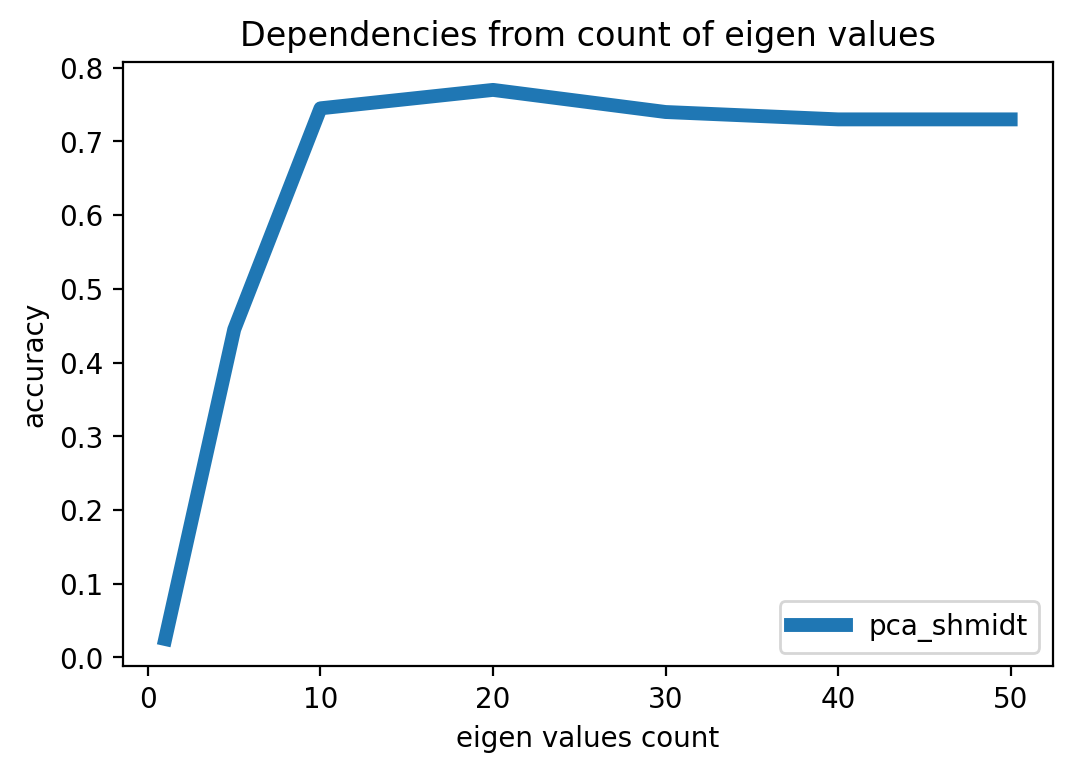

In [75]:
pca_eig_count_acc = []
eigs =[1, 5, 10, 20, 30, 40, 50]

print(np.array(imgs).shape)

for eig_count in eigs:
    imgs_pca = get_pca_imgs_shmidt(imgs, eig_count)
    test, train = test_train(imgs_pca, 5)
    _, acc = (fr(test, train, 5))
    pca_eig_count_acc.append(acc)
    
x = list(range(1,10))
plt.title('Dependencies from count of eigen values')   # заголовок
plt.xlabel('eigen values count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(eigs, pca_eig_count_acc, label = "pca_shmidt", linewidth=5.0)

plt.legend()
plt.savefig("res/pca_shmidt_eig.eps")

In [76]:
pca_acc_gramm = []
pca_shmidt = get_pca_imgs_shmidt(imgs, 30)

for i in range(1,test_count):
    test, train = test_train(pca_shmidt, i)
    result[i-1][3], acc = (fr(test, train, i))
    pca_acc_gramm.append(acc)

0.611111111111111
0.675
0.7035714285714285
0.7375
0.74
0.83125
0.8666666666666666
0.8875
0.875


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.611111111111111, 0.675, 0.7035714285714285, 0.7375, 0.74, 0.83125, 0.8666666666666666, 0.8875, 0.875]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


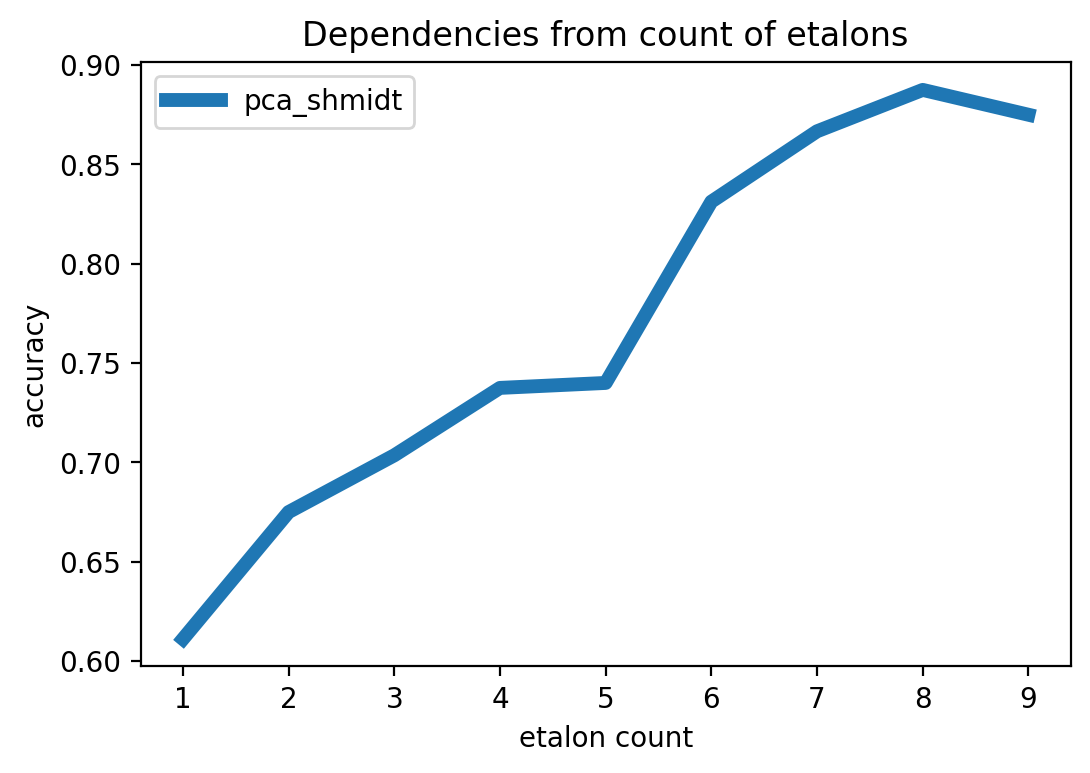

In [77]:
x = list(range(1,10))
print(pca_acc_gramm)
print(x)
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(x, pca_acc_gramm, label = "pca_shmidt", linewidth=5.0)

plt.legend()
plt.savefig("res/pca_shmidt.eps")

In [78]:
# cascad
mult = 1
reshapeY = len(rescale(imgs[0][0],mult))
reshapeX = len(rescale(imgs[0][0],mult)[0])
imgs_prePCA = get_imgs_scaled(imgs, mult)
m_imgs = np.reshape(imgs_prePCA, (total_imgs , len(imgs_prePCA[0][0])))
m_imgs = np.array([np.reshape(i, (reshapeY, reshapeX)) for i in m_imgs])

m_cov = np.sum([np.dot(i, i.T) for i in m_imgs], axis = 0) / (reshapeY*reshapeX) 
values, vectors = eig(m_cov)
m_imgs1 = np.array([np.dot(vectors.T, i) for i in m_imgs])

m_cov2 = np.sum([np.dot(i.T, i) for i in m_imgs1], axis = 0) / (reshapeY*reshapeX) 
print(m_cov2.shape)
values, vectors = eig(m_cov2)
m_imgs2 = np.array([np.dot(i, vectors) for i in m_imgs])
print(m_imgs2.shape)

(92, 92)
(400, 112, 92)


In [79]:
def pca2d_to_fin(imgs, size_x, size_y):
    res = [i[:size_x,:size_y] for i in imgs]
    res = np.reshape(res, (class_count, image_count, size_x*size_y))
    return res

(40, 10, 112, 92)
0.15
0.6
0.6849999999999999
0.725
0.76
0.78
0.78
0.78
0.795


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.805


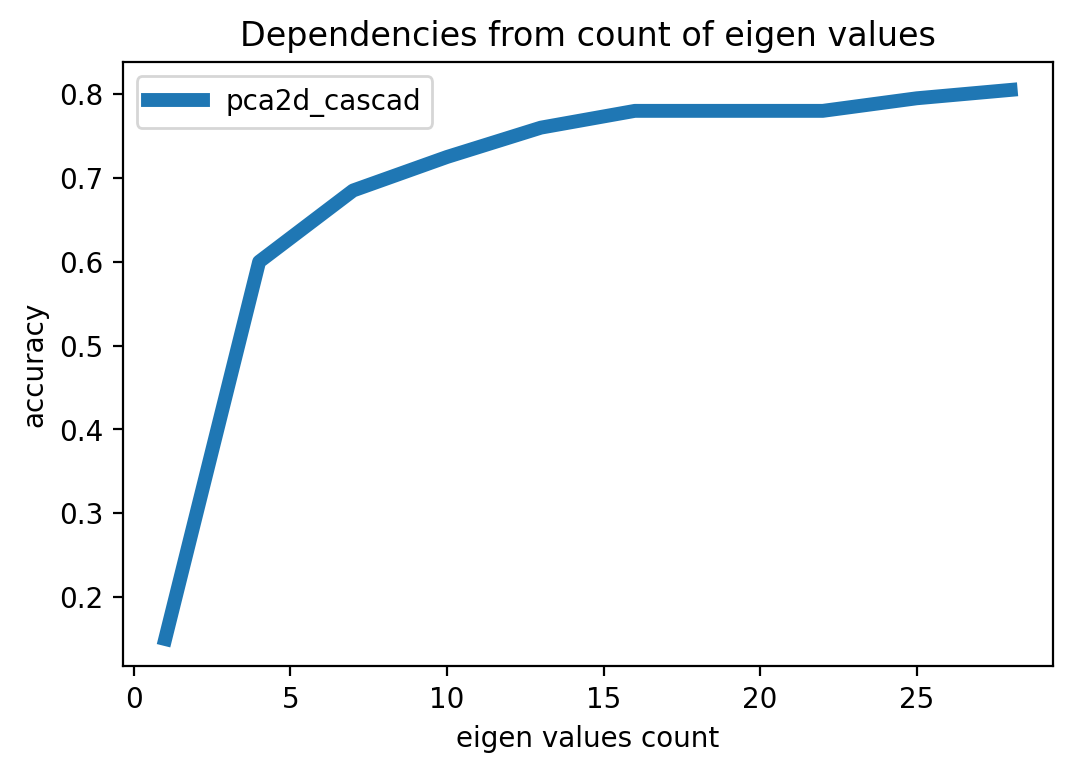

In [114]:
pca_eig_count_acc = []
eigs_2d=list(range(1,30, 3))

print(np.array(imgs).shape)

for eig_count in eigs_2d:
    imgs_pca = pca2d_to_fin(m_imgs2, eig_count, eig_count)
    test, train = test_train(imgs_pca, 5)
    _, acc = (fr(test, train, 5))
    pca_eig_count_acc.append(acc)
    
x = list(range(1,10))
plt.title('Dependencies from count of eigen values')   # заголовок
plt.xlabel('eigen values count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(eigs_2d, pca_eig_count_acc, label = "pca2d_cascad", linewidth=5.0)

plt.legend()
plt.savefig("res/pca2d_cascad_eig.eps")

In [115]:
imgs_2dpca_cascad = []
pca2d_cascad_acc = []

imgs_2dpca_cascad = pca2d_to_fin(m_imgs2, 6, 6)

for i in range(1,test_count):
    test, train = test_train(imgs_2dpca_cascad, i)
    result[i-1][4], acc = (fr(test, train, i))
    pca2d_cascad_acc.append(acc)

0.49444444444444446
0.575
0.6428571428571429
0.6666666666666667
0.675
0.79375
0.7916666666666667
0.85
0.85


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


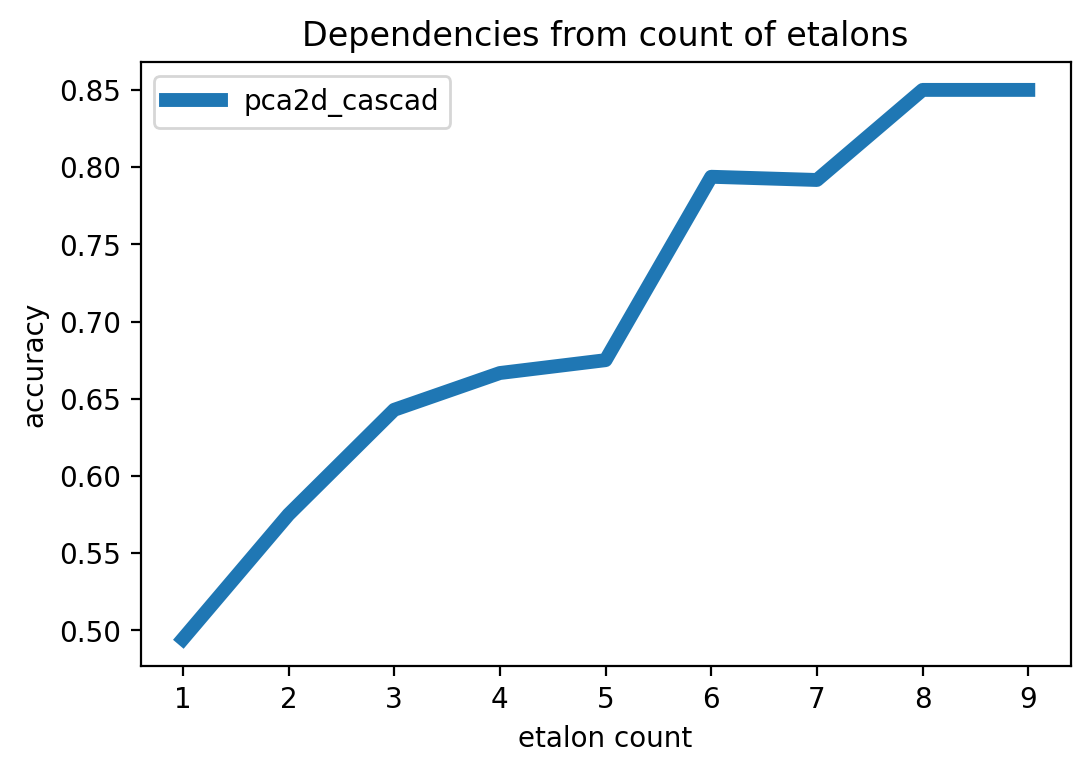

In [113]:
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(list(range(1,10)), pca2d_cascad_acc, label = "pca2d_cascad", linewidth=5.0)

plt.legend()
plt.savefig("res/pca2d_cascad_eig.eps")

In [83]:
# parallel
mult = 1
reshapeY = len(rescale(imgs[0][0],mult))
reshapeX = len(rescale(imgs[0][0],mult)[0])
imgs_prePCA = get_imgs_scaled(imgs, mult)
m_imgs = np.reshape(imgs_prePCA, (total_imgs , len(imgs_prePCA[0][0])))
m_imgs = np.array([np.reshape(i, (reshapeY, reshapeX)) for i in m_imgs])

m_cov = np.sum([np.dot(i, i.T) for i in m_imgs], axis = 0) / (reshapeY*reshapeX) 
m_cov2 = np.sum([np.dot(i.T, i) for i in m_imgs], axis = 0) / (reshapeY*reshapeX) 
_, vectors = eig(m_cov)
_, vectors2 = eig(m_cov2)
m_imgs = np.array([np.dot(np.dot(vectors.T, i),  vectors2) for i in m_imgs])

(40, 10, 112, 92)
0.1
0.635
0.85
0.885
0.915
0.9
0.925
0.9349999999999999
0.925
0.9199999999999999


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


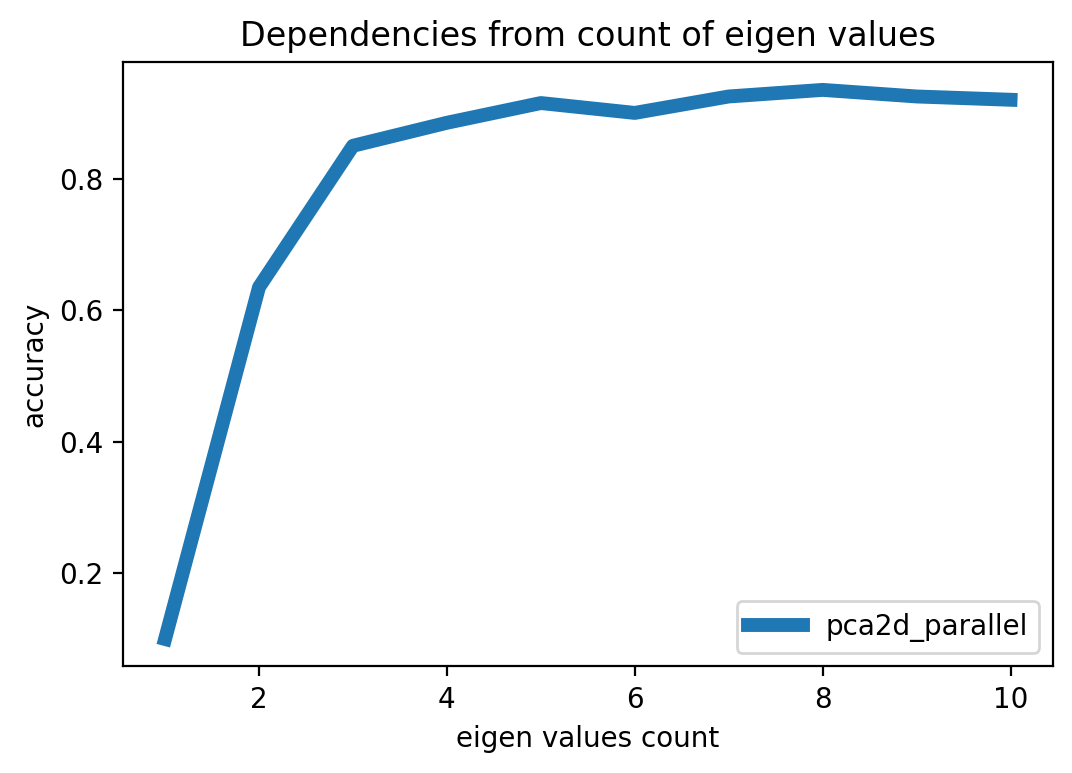

In [116]:
pca_eig_count_acc = []
eigs_2d=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print(np.array(imgs).shape)

for eig_count in eigs_2d:
    imgs_pca = pca2d_to_fin(m_imgs, eig_count, eig_count)
    test, train = test_train(imgs_pca, 5)
    _, acc = (fr(test, train, 5))
    pca_eig_count_acc.append(acc)
    
x = list(range(1,10))
plt.title('Dependencies from count of eigen values')   # заголовок
plt.xlabel('eigen values count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(eigs_2d, pca_eig_count_acc, label = "pca2d_parallel", linewidth=5.0)

plt.legend()
plt.savefig("res/pca2d_parallel_eig.eps")

In [117]:
imgs_2dpca_parallel = []
pca2d_parallel_acc = []

imgs_2dpca_parallel = pca2d_to_fin(m_imgs, 6, 6)

for i in range(1,test_count):
    test, train = test_train(imgs_2dpca_parallel, i)
    result[i-1][5], acc = (fr(test, train, i))
    pca2d_parallel_acc.append(acc)

0.7305555555555555
0.83125
0.85
0.8833333333333334
0.9
0.96875
0.975
0.9875
1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


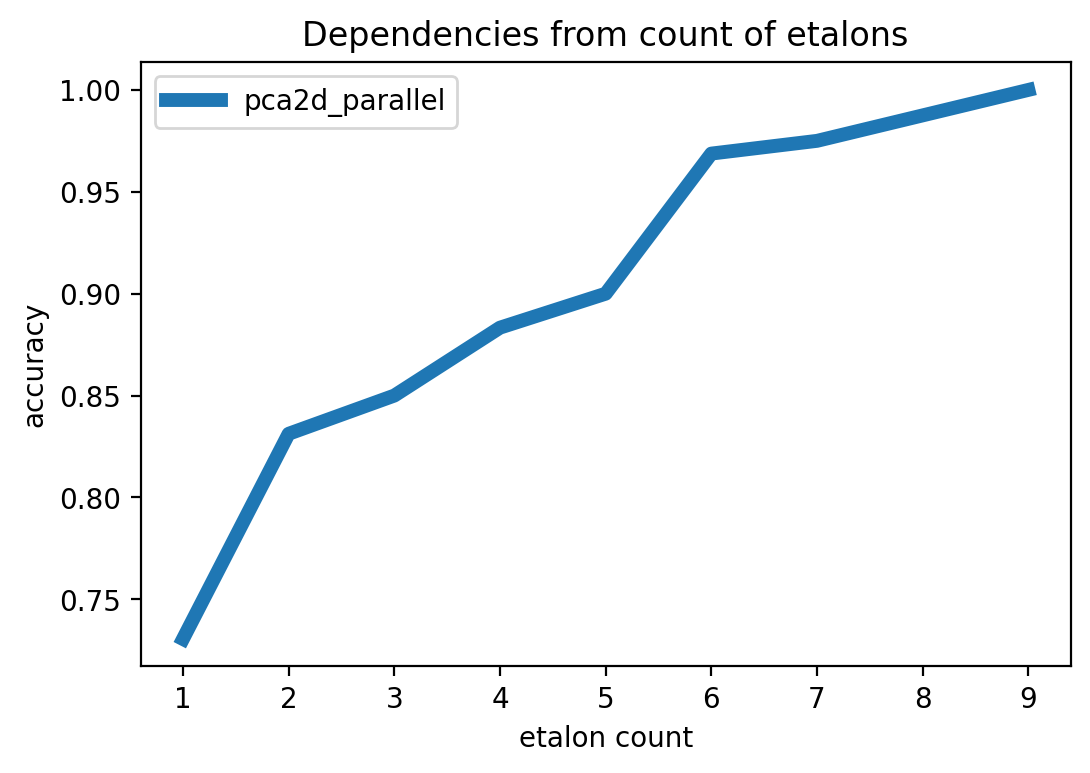

In [86]:
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(list(range(1,10)), pca2d_parallel_acc, label = "pca2d_parallel", linewidth=5.0)

plt.legend()
plt.savefig("res/pca2d_parallel.eps")

In [87]:
mult = 1
reshapeY = len(rescale(imgs[0][0],mult))
reshapeX = len(rescale(imgs[0][0],mult)[0])
print(reshapeY, reshapeX)
imgs_preLDA = np.array(get_imgs_scaled(imgs, mult))

print(imgs_preLDA.shape)

imgs_preLDA = np.reshape(imgs_preLDA, (class_count, image_count, reshapeY, reshapeX))
print(imgs_preLDA.shape)
LDA_mid_in = np.sum(imgs_preLDA, axis = 1) / (image_count)
LDA_mid_total = np.sum(LDA_mid_in, axis = 0) / (class_count)
print(LDA_mid_in.shape)
print(LDA_mid_total.shape)

LDA_Wr = np.zeros((reshapeY, reshapeY))
LDA_Br = np.zeros((reshapeY, reshapeY))
LDA_Wc = np.zeros((reshapeX, reshapeX))
LDA_Bc = np.zeros((reshapeX, reshapeX))

for k in range(class_count):
    temp = LDA_mid_in[k] - LDA_mid_total
    LDA_Br += np.dot(temp, temp.T)
    LDA_Bc += np.dot(temp.T, temp)
    for l in range(image_count):
        temp = imgs_preLDA[k][l] - LDA_mid_in[k]
        LDA_Wr += np.dot(temp, temp.T)
        LDA_Wc += np.dot(temp.T, temp)
        
        
LDA_Sr = np.dot(np.linalg.inv(LDA_Wr), LDA_Br) 
print(LDA_Sr.shape)
LDA_Sc = np.dot(np.linalg.inv(LDA_Wc), LDA_Bc) 
print(LDA_Sc.shape)


_, vectors = eig(LDA_Sr)
_, vectors2 = eig(LDA_Sc)

imgs_LDA = []
# imgs_LDA = np.array((class_count * image_count, reshapeY, reshapeX))
count = 0
for k in range(class_count):
    for l in range(image_count):
        imgs_LDA.append(np.dot(np.dot(vectors.T, imgs_preLDA[k][l]),  vectors2))
        count += 1
# imgs_LDA = np.array([np.dot(np.dot(vectors.T, i),  vectors2) for i in imgs_preLDA])
imgs_LDA = np.array(imgs_LDA)
print(imgs_LDA.shape)


112 92
(40, 10, 10304)
(40, 10, 112, 92)
(40, 112, 92)
(112, 92)
(112, 112)
(92, 92)
(400, 112, 92)


(40, 10, 112, 92)
0.12
0.73
0.8300000000000001
0.8949999999999999
0.9199999999999999
0.9199999999999999
0.925
0.925
0.945


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.95


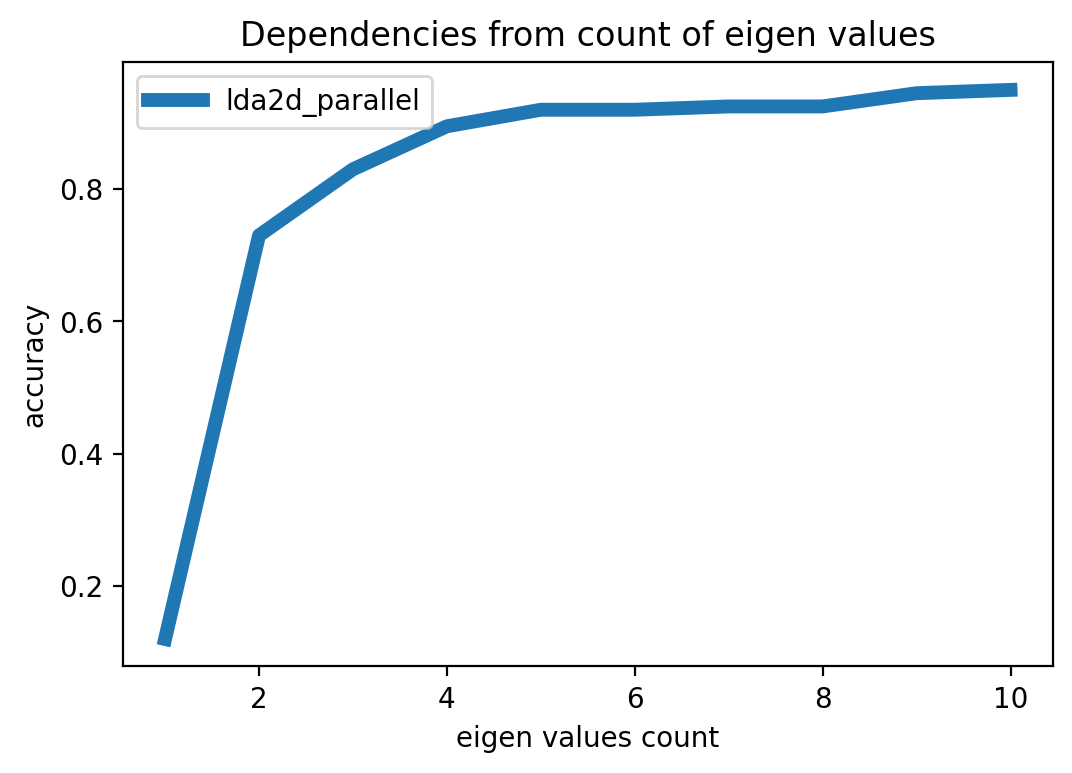

In [91]:
pca_eig_count_acc = []
eigs_2d=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print(np.array(imgs).shape)

for eig_count in eigs_2d:
    imgs_pca = pca2d_to_fin(imgs_LDA, eig_count, eig_count)
    test, train = test_train(imgs_pca, 5)
    _, acc = (fr(test, train, 5))
    pca_eig_count_acc.append(acc)
    
x = list(range(1,10))
plt.title('Dependencies from count of eigen values')   # заголовок
plt.xlabel('eigen values count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(eigs_2d, pca_eig_count_acc, label = "lda2d_parallel", linewidth=5.0)

plt.legend()
plt.savefig("res/lda2d_parallel_eig.eps")

In [92]:

lda2d_acc = []
imgs_2dlda = pca2d_to_fin(imgs_LDA, 10, 10)
for i in range(1,test_count):
    test, train = test_train(imgs_2dlda, i)
    result[i-1][6], acc = (fr(test, train, i))
    lda2d_acc.append(acc)

0.8138888888888889
0.909375
0.9321428571428572
0.9458333333333334
0.95
0.98125
0.9666666666666666
0.9625
0.95


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


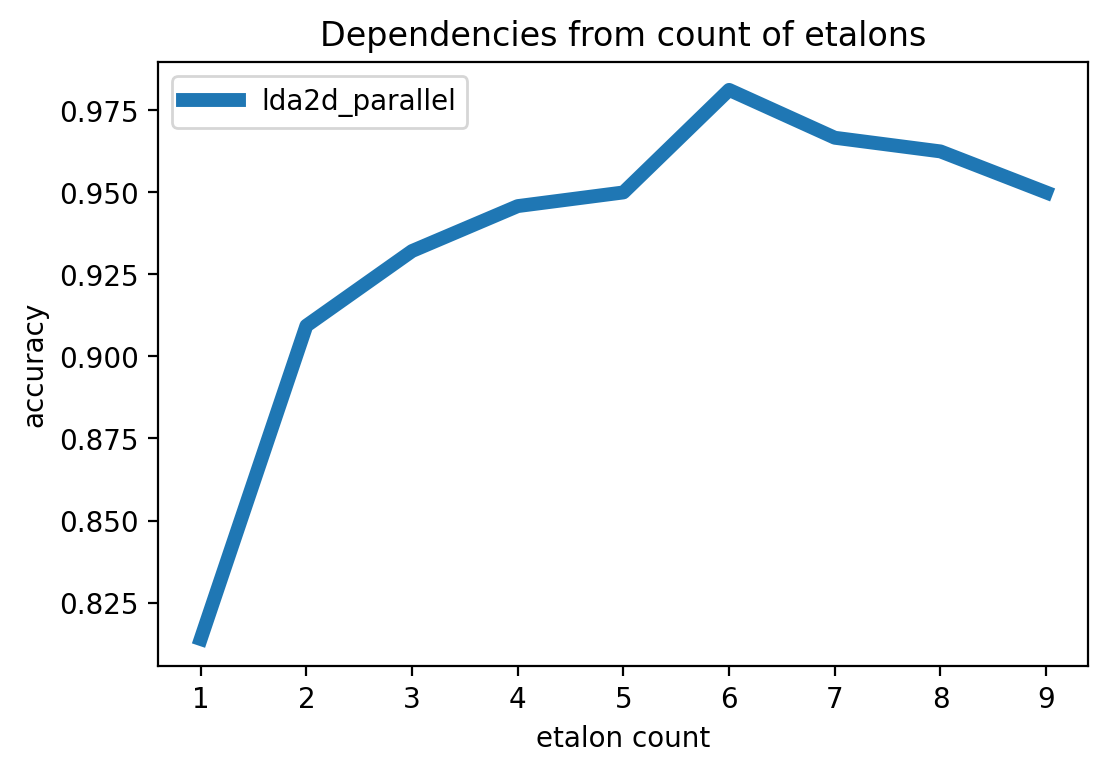

In [93]:
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(list(range(1,10)), lda2d_acc, label = "lda2d_parallel", linewidth=5.0)

plt.legend()
plt.savefig("res/lda2d_parallel.eps")

In [99]:
mult = 1
reshapeY = len(rescale(imgs[0][0],mult))
reshapeX = len(rescale(imgs[0][0],mult)[0])

imgs_preLDA = np.array(get_imgs_scaled(imgs, mult))
imgs_preLDA = np.reshape(imgs_preLDA, (class_count, image_count, reshapeY, reshapeX))

LDA_mid_in = np.sum(imgs_preLDA, axis = 1) / (image_count)
LDA_mid_total = np.sum(LDA_mid_in, axis = 0) / (class_count)

LDA_Wr = np.zeros((reshapeY, reshapeY))
LDA_Br = np.zeros((reshapeY, reshapeY))

for k in range(class_count):
    temp = LDA_mid_in[k] - LDA_mid_total
    LDA_Br += np.dot(temp, temp.T)
    for l in range(image_count):
        temp = imgs_preLDA[k][l] - LDA_mid_in[k]
        LDA_Wr += np.dot(temp, temp.T)
        
        
LDA_Sr = np.dot(np.linalg.inv(LDA_Wr), LDA_Br) 


_, vectors = eig(LDA_Sr)

imgs_preLDA2 = []

for k in range(class_count):
    imgs_preLDA2.append([])
    for l in range(image_count):
        imgs_preLDA2[k].append(np.dot(vectors.T, imgs_preLDA[k][l]))
                                    
imgs_preLDA2 = np.array(imgs_preLDA2)
                                   
                                    
LDA_mid_in2 = np.sum(imgs_preLDA2, axis = 1) / (image_count)
LDA_mid_total2 = np.sum(LDA_mid_in, axis = 0) / (class_count)

LDA_Wc = np.zeros((reshapeX, reshapeX))
LDA_Bc = np.zeros((reshapeX, reshapeX))


for k in range(class_count):
    temp = LDA_mid_in2[k] - LDA_mid_total2
    LDA_Bc += np.dot(temp.T, temp)
    for l in range(image_count):
        temp = imgs_preLDA[k][l] - LDA_mid_in2[k]
        LDA_Wc += np.dot(temp.T, temp)

LDA_Sc = np.dot(np.linalg.inv(LDA_Wc), LDA_Bc) 

_, vectors2 = eig(LDA_Sc)


imgs_LDA = []
# imgs_LDA = np.array((class_count * image_count, reshapeY, reshapeX))
count = 0
for k in range(class_count):
    for l in range(image_count):
        imgs_LDA.append(np.dot(imgs_preLDA2[k][l],  vectors2))
# imgs_LDA = np.array([np.dot(np.dot(vectors.T, i),  vectors2) for i in imgs_preLDA])
imgs_LDA = np.array(imgs_LDA)
print(imgs_LDA.shape)


(400, 112, 92)


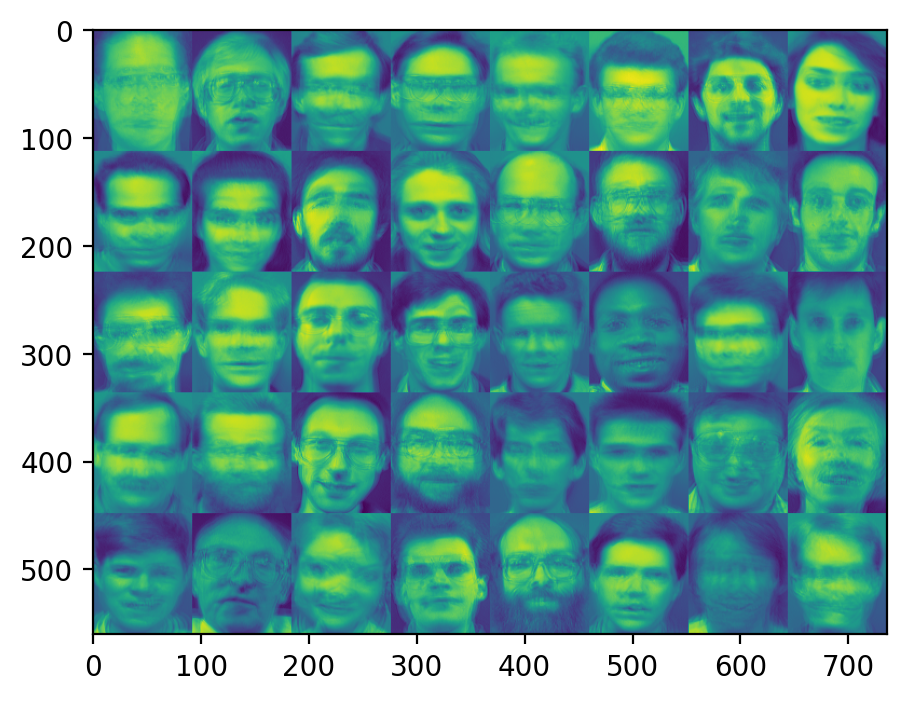

In [111]:

LDA_mid_in = np.sum(imgs_preLDA, axis = 1) / (image_count)

pic_temp = []
for i in range(5):
    pic_temp.append(np.concatenate(LDA_mid_in[i*8:(i+1)*8], axis=1))  
    
pic_fin = np.concatenate(pic_temp, axis = 0)
plt.imshow(pic_fin)

mpimg.imsave("res/LDA_in.png", pic_fin)

(40, 10, 112, 92)
0.145
0.65
0.805
0.8699999999999999
0.915
0.9
0.9349999999999999
0.93
0.9199999999999999


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9349999999999999


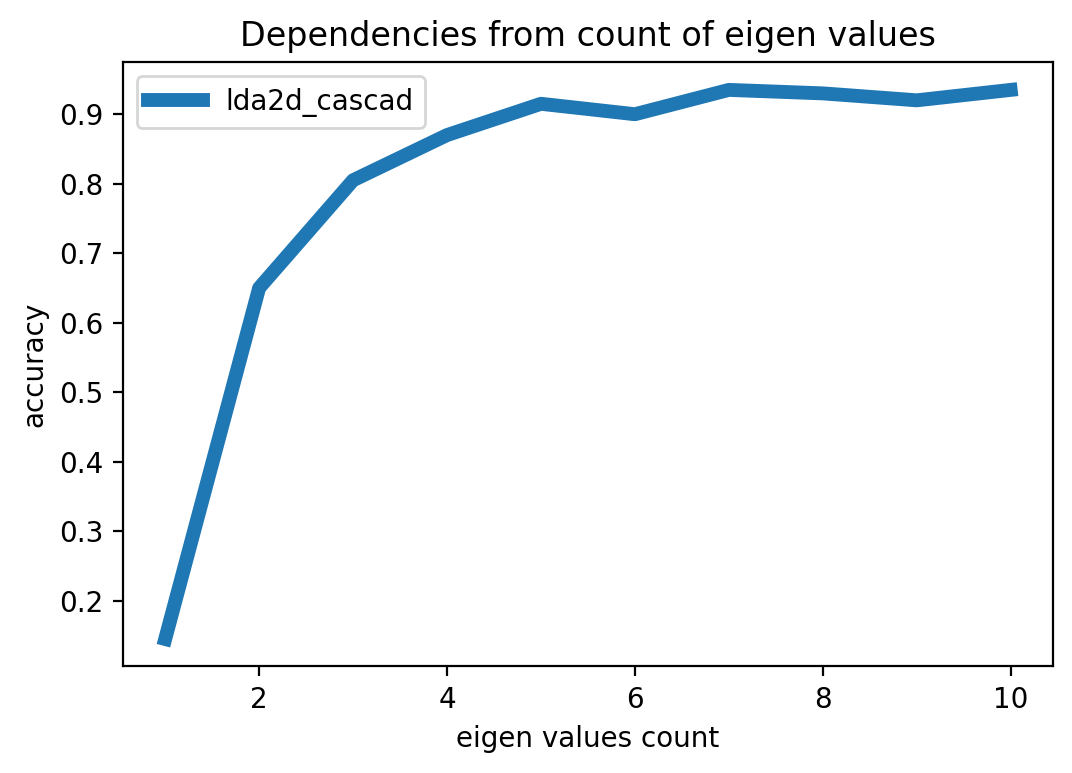

In [101]:
pca_eig_count_acc = []
eigs_2d=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print(np.array(imgs).shape)

for eig_count in eigs_2d:
    imgs_pca = pca2d_to_fin(imgs_LDA, eig_count, eig_count)
    test, train = test_train(imgs_pca, 5)
    _, acc = (fr(test, train, 5))
    pca_eig_count_acc.append(acc)
    
x = list(range(1,10))
plt.title('Dependencies from count of eigen values')   # заголовок
plt.xlabel('eigen values count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(eigs_2d, pca_eig_count_acc, label = "lda2d_cascad", linewidth=5.0)

plt.legend()
plt.savefig("res/lda2d_cascad_eig.eps")

In [104]:

lda2d_acc = []
imgs_2dlda = pca2d_to_fin(imgs_LDA, 6, 6)
for i in range(1,test_count):
    test, train = test_train(imgs_2dlda, i)
    result[i-1][6], acc = (fr(test, train, i))
    lda2d_acc.append(acc)

0.75
0.86875
0.8964285714285714
0.9
0.9
0.95
0.9583333333333334
0.95
0.975


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


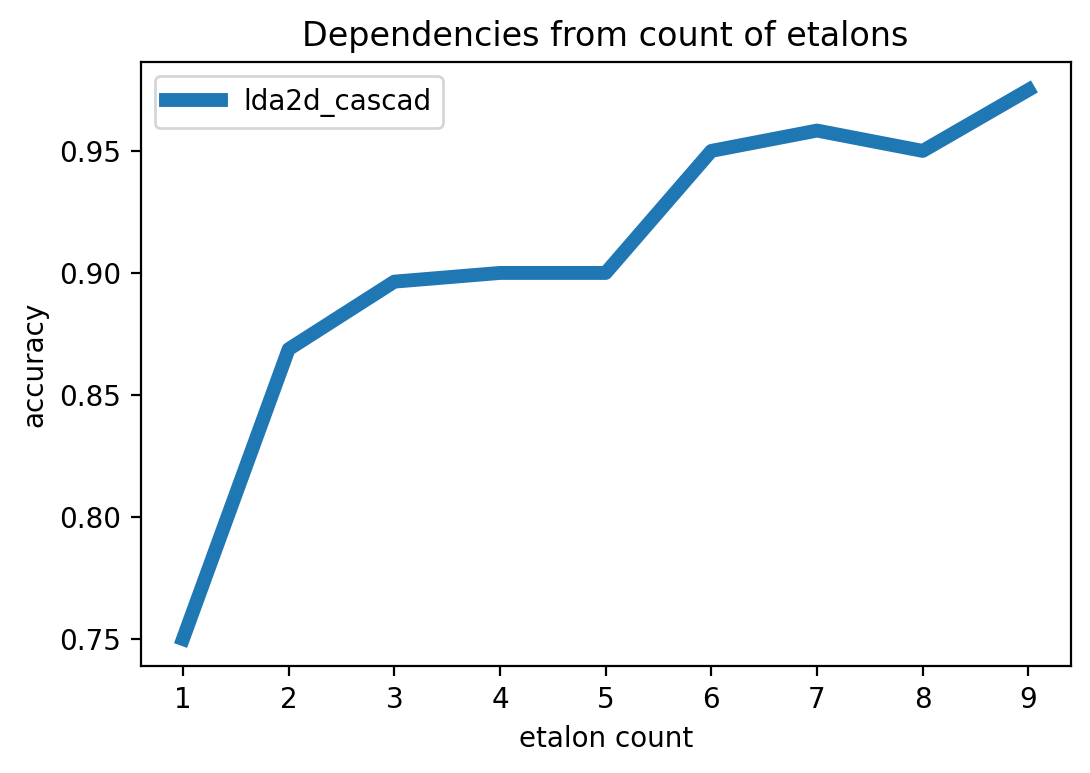

In [105]:
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(list(range(1,10)), lda2d_acc, label = "lda2d_cascad", linewidth=5.0)

plt.legend()
plt.savefig("res/lda2d_cascad.eps")

In [ ]:
print(rescale(imgs[0][0],1).shape)

In [96]:
def submatrix( matrix, startRow, startCol, size):
    return x[startRow:startRow+size,startCol:startCol+size]


In [22]:
a = np.array([[1, 0], [2, 3]])
print(np.dot(a, a.T))

[[ 1  2]
 [ 2 13]]


In [23]:
a = np.array([[1, 0], [2, 3]])
print(np.sum(a, axis = 0))

[3 3]


In [24]:
a = np.array([[1, 0, 5], [2, 3, 7], [7, 4, 2]])
print(submatrix())
print(a[:][:2])

TypeError: submatrix() missing 4 required positional arguments: 'matrix', 'startRow', 'startCol', and 'size'